In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/My Drive/pp/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test_x.csv')
submission = pd.read_csv(path+'sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

dtypes: float64(20), int64(54), object(4)

Length: 78

45532 entries, 0 to 45531
Data columns (total 78 columns)

In [4]:
train.isnull().sum().sum()
# no 결측치

0

In [5]:
# 문자전환
train = train.replace(' ', '')

# 만약 결측치가 문자열 스페이스(' ')로 되어 있다면, np.nan으로 바꾸어 Pandas 라이브러리가 인식할수 있도록 변환
train = train.replace('', np.nan)

# 결측 row 제거하는 방법
train.dropna(how='all') # 'all':한 행이 모두 missing value이면 제거, any': 행 내에서 하나라도

# 결측치 처리
train.fillna(0, inplace=True)

In [6]:
train.voted.value_counts()

2    24898
1    20634
Name: voted, dtype: int64

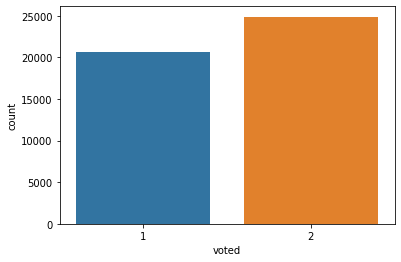

In [7]:
barchart=sns.countplot(x='voted',data=train)
# not unbalanced data.

In [8]:
## 마키아벨리아니즘 테스트 스코어는 -부호를 가진 문항들의 답변값을 reverse 시키고 모든 문항의 답변들의 평균을 구한 것
# 그러므로 어떤 항목이 - 인지 파악한 후 reverse 취해줘야 함.

# reverse 안 했을 때
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

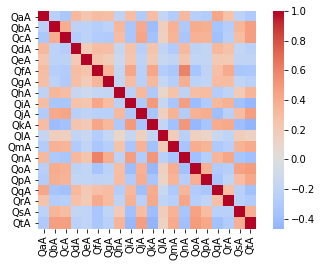

In [9]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)


In [10]:
## reverse
# "QeA", "QfA", "QkA", "QqA", "QrA" 이렇게 다섯 문항은 부호가 -인 것을 이미 알고 있기 때문에 reverse 처리

for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


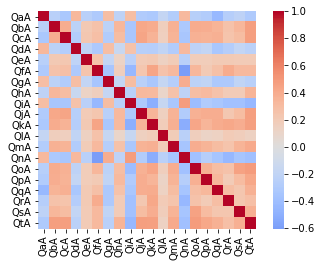

In [11]:
## 이미 부호 - 인거 아는 애들 플립시켜줌
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

## 5개의 파란 줄 : 추가로 - 부호를 가진 문항들."QaA", "QdA", "QgA", "QiA", "QnA"

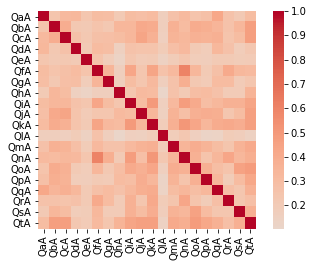

In [12]:
## 나머지 더 flip

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip] 

correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

## 상관계수가 다 0 이상이다..

In [13]:
## MACH_SCORE 추가하는 것
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00


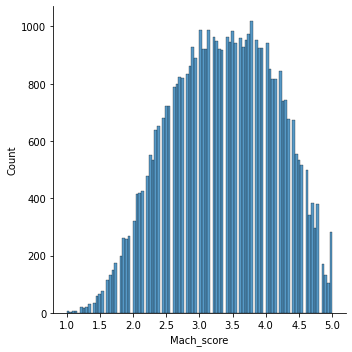

In [14]:
sns.displot(train, x="Mach_score", bins=100)


In [15]:
# 범주형 변수 처리
print(train.race.value_counts()) 
print('\n')
print(train.age_group.value_counts())
print('\n')
print(train.gender.value_counts())
print('\n')
print(train.religion.value_counts())


White                    31248
Asian                     6834
Other                     4330
Black                     2168
Native American            548
Arab                       351
Indigenous Australian       53
Name: race, dtype: int64


10s     14215
20s     14112
30s      7836
40s      5051
50s      2889
60s      1194
+70s      235
Name: age_group, dtype: int64


Male      24217
Female    21315
Name: gender, dtype: int64


Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64


In [16]:
## MEAN ENCODING

target = 'voted'

gender_mean = train.groupby('gender')[target].mean()

race_mean = train.groupby('race')[target].mean()

age_group_mean = train.groupby('age_group')[target].mean()

religion_mean = train.groupby('religion')[target].mean()


In [17]:
# 기존 변수에 encoded 된 값을 매핑 
train['gender_mean'] = train['gender'].map(gender_mean) 
train['race_mean'] = train['race'].map(race_mean) 
train['age_group_mean'] = train['age_group'].map(age_group_mean) 
train['religion_mean'] = train['religion'].map(religion_mean) 


In [18]:
X = train.drop(['index','voted','gender','religion','age_group','race'], axis = 1)
y = train['voted']
print(X.shape)
print(y.shape)

(45532, 77)
(45532,)


In [19]:
X.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score,gender_mean,race_mean,age_group_mean,religion_mean
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,2,1,4,1,3,2,2,2,1,2,1,7,4,4,3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95,1.539573,1.495776,1.411179,1.582809
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,4,2,3,1,1,1,1,0,0,1,2,3,4,0,4,3,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60,1.539573,1.704565,1.469671,1.613016
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,3,1,3,1,2,2,3,1,5,3,4,2,6,1,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90,1.553206,1.495776,1.411179,1.582809
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,4,2,0,1,1,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35,1.539573,1.704565,1.469671,1.613016
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,3,1,2,1,2,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00,1.553206,1.495776,1.469671,1.542602


In [20]:
# X끼리 상관계수 높은 애들을 추려보자

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 20))

Top Absolute Correlations
QkA        Mach_score        0.693034
QtA        Mach_score        0.688007
QnA        Mach_score        0.665896
QiA        Mach_score        0.651903
QoA        Mach_score        0.634784
QbA        Mach_score        0.624758
wr_02      wr_10             0.622419
QcA        Mach_score        0.614702
QjA        Mach_score        0.602092
QqA        Mach_score        0.601615
QmA        Mach_score        0.598042
QfA        QnA               0.586806
           Mach_score        0.583161
wr_07      wr_10             0.579492
QpA        Mach_score        0.568852
QsA        Mach_score        0.555736
education  age_group_mean    0.551232
QrA        Mach_score        0.545148
wr_02      wr_07             0.542845
tp01       tp06              0.533509
dtype: float64


In [21]:
x = train[['QkA','QtA','QnA','QiA','QoA','QbA','wr_02','QcA','QjA','QqA','QmA','QfA','wr_07','QpA','QsA','education','QrA','tp01','Mach_score','tp06','age_group_mean']]
y = train['voted'].values # 종속변인 추출

x

,QkA,QtA,QnA,QiA,QoA,QbA,wr_02,QcA,QjA,QqA,QmA,QfA,wr_07,QpA,QsA,education,QrA,tp01,Mach_score,tp06,age_group_mean
0,2.0,1.0,1.0,1.0,2.0,4.0,1,5.0,4.0,4.0,2.0,1.0,1,2.0,2.0,2,4.0,2,2.95,1,1.411179
1,1.0,1.0,1.0,1.0,1.0,5.0,1,3.0,3.0,1.0,1.0,3.0,1,5.0,4.0,4,5.0,1,2.60,2,1.469671
2,1.0,1.0,2.0,3.0,2.0,1.0,1,1.0,2.0,1.0,2.0,5.0,1,1.0,1.0,3,2.0,2,1.90,4,1.411179
3,3.0,5.0,2.0,1.0,4.0,3.0,1,4.0,4.0,3.0,4.0,4.0,0,4.0,4.0,4,2.0,2,3.35,3,1.469671
4,1.0,2.0,4.0,1.0,1.0,1.0,1,5.0,5.0,1.0,4.0,4.0,1,4.0,1.0,3,1.0,1,3.00,2,1.469671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,4.0,5.0,5.0,2.0,5.0,1,4.0,4.0,4.0,4.0,5.0,1,4.0,5.0,2,5.0,1,4.15,6,1.837214
45528,4.0,4.0,4.0,4.0,4.0,3.0,1,4.0,5.0,4.0,3.0,4.0,1,4.0,4.0,2,3.0,2,3.80,3,1.411179
45529,1.0,1.0,2.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,2.0,1,1.0,3.0,2,1.0,4,1.50,1,1.837214
45530,1.0,1.0,3.0,1.0,1.0,3.0,1,4.0,1.0,2.0,4.0,5.0,1,1.0,4.0,4,2.0,1,2.90,1,1.357949


In [22]:
## PCA
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = train[['QkA','QtA','QnA','QiA','QoA','QbA','wr_02','QcA','QjA','QqA','QmA','QfA','wr_07','QpA','QsA','education','QrA','tp01','Mach_score','tp06','age_group_mean']]
y = train['voted'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2','PC3','PC4'])
# 주성분으로 이루어진 데이터 프레임 구성

In [31]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)


[0.31634462 0.07873824 0.07528301 0.06914005]


0.5395059249050409

In [34]:
X1 = X.drop(['QkA','QtA','QnA','QiA','QoA','QbA','wr_02','QcA','QjA','QqA','QmA','QfA','wr_07','QpA','QsA','education','QrA','tp01','Mach_score','tp06','age_group_mean'], axis = 1)
X_pca = X1.join(principalDf)
X_pca

,QaA,QaE,QbE,QcE,QdA,QdE,QeA,QeE,QfE,QgA,QgE,QhA,QhE,QiE,QjE,QkE,QlA,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE,engnat,familysize,hand,married,tp02,tp03,tp04,tp05,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_03,wr_04,wr_05,wr_06,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,gender_mean,race_mean,religion_mean,PC1,PC2,PC3,PC4
0,3.0,363,1370,997,5.0,1024,4.0,1577,539,4.0,586,4.0,1095,1142,1287,883,4.0,851,851,816,579,924,366,876,633,1115,1,4,1,3,2,2,1,2,7,4,4,3,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1.539573,1.495776,1.582809,2.026613,0.556987,-0.695978,0.150117
1,1.0,647,1313,3387,1.0,2969,5.0,4320,2190,5.0,826,1.0,4082,1867,1264,2943,4.0,3927,4329,1828,1214,2414,1356,3039,4304,1346,2,3,1,1,1,0,0,1,3,4,0,4,3,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1.539573,1.704565,1.613016,2.467313,-0.586766,0.612903,0.368791
2,2.0,1623,1480,1021,2.0,3374,1.0,1333,531,2.0,1167,1.0,1016,2653,1569,998,5.0,2547,918,2153,1304,1131,937,1327,1170,1409,1,3,1,2,3,1,5,3,2,6,1,3,2,0,0,1,1,0,1,1,0,1,1,1,0,1,1,1.553206,1.495776,1.582809,4.242870,-1.289163,0.623860,-0.476033
3,3.0,504,2311,992,3.0,3245,5.0,357,1519,2.0,159,3.0,2275,2809,5614,3219,4.0,1296,9046,1216,1169,23868,581,8830,2392,1312,2,0,1,1,4,1,1,1,1,3,1,3,3,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1.539573,1.704565,1.613016,-0.162288,1.591937,2.023805,2.101499
4,5.0,927,707,556,4.0,1062,5.0,1014,628,5.0,991,1.0,1259,1153,1388,740,5.0,1181,547,575,754,1140,323,1070,583,1889,1,2,1,2,1,1,6,0,0,6,2,6,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1.553206,1.495776,1.542602,1.986754,-0.372402,0.137172,0.489304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,619,328,5.0,285,5.0,602,267,5.0,315,1.0,483,1016,278,611,5.0,215,388,299,1915,439,823,309,586,2252,1,1,3,1,2,6,1,2,3,0,6,4,3,0,0,1,1,0,1,1,0,1,1,1,0,1,1,1.539573,1.495776,1.449692,-2.589162,-0.314405,1.346885,-2.141792
45528,4.0,581,1353,1164,5.0,798,3.0,1680,560,4.0,640,1.0,1415,4494,1392,2478,5.0,1268,843,1401,1524,719,754,1118,654,1197,1,2,1,1,2,2,3,1,3,4,1,5,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,1.553206,1.495776,1.572704,-1.719972,-0.399879,0.431644,-0.204276
45529,2.0,593,857,1047,2.0,1515,1.0,1690,1253,1.0,1094,1.0,1283,2209,1764,1062,5.0,1489,1908,891,1298,1200,473,1779,1355,667,1,1,1,1,4,2,4,0,0,2,1,6,2,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1.539573,1.495776,1.539615,5.249654,0.894428,-1.494469,-1.495019
45530,5.0,747,1331,892,4.0,1281,5.0,1328,599,5.0,650,1.0,1429,1748,770,1025,5.0,742,4180,707,489,913,1301,1680,737,1124,1,2,3,1,2,0,4,0,3,2,2,4,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1.553206,1.495776,1.572704,2.545153,-1.497145,0.327102,0.595722


In [27]:
y = train['voted']
y

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.3,random_state=10)       # 국룰이라는 7:3으로 train:test
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

In [36]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
modeling(lgb,X_train,X_test,y_train,y_test)
y_pred = lgb.predict(X_test)

정확도 : 0.70, 정밀도 : 0.64, 재현율 : 0.73
f1-score : 0.69, auc : 0.70


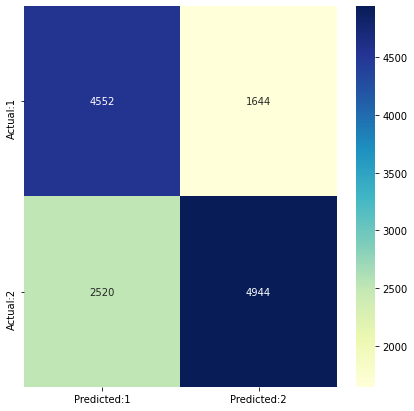

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2'],index=['Actual:1','Actual:2'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [39]:
!pip install catboost


     |████████████████████████████████| 66.2MB 70kB/s 


In [40]:
# catboost

from catboost import CatBoostClassifier, Pool

catboost = CatBoostClassifier(iterations=10)
modeling(catboost,X_train,X_test,y_train,y_test)
y_pred = catboost.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.6191305	total: 75.5ms	remaining: 680ms
1:	learn: 0.5981530	total: 100ms	remaining: 400ms
2:	learn: 0.5893798	total: 125ms	remaining: 291ms
3:	learn: 0.5836567	total: 151ms	remaining: 226ms
4:	learn: 0.5799344	total: 174ms	remaining: 174ms
5:	learn: 0.5771438	total: 201ms	remaining: 134ms
6:	learn: 0.5749736	total: 227ms	remaining: 97.1ms
7:	learn: 0.5723906	total: 251ms	remaining: 62.7ms
8:	learn: 0.5693522	total: 274ms	remaining: 30.4ms
9:	learn: 0.5669303	total: 298ms	remaining: 0us
정확도 : 0.69, 정밀도 : 0.64, 재현율 : 0.72
f1-score : 0.68, auc : 0.69


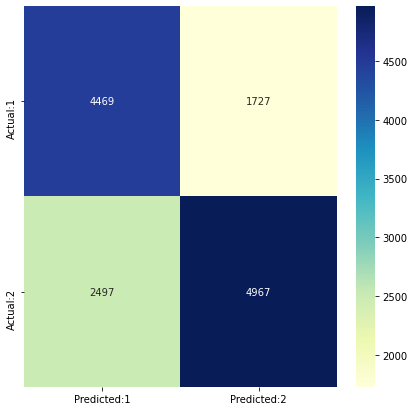

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2'],index=['Actual:1','Actual:2'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [42]:
# XGBOOST

import xgboost as xgb
xgbcl = xgb.XGBClassifier()
modeling(xgbcl,X_train,X_test,y_train,y_test)
y_pred = xgbcl.predict(X_test)

정확도 : 0.69, 정밀도 : 0.64, 재현율 : 0.73
f1-score : 0.68, auc : 0.69


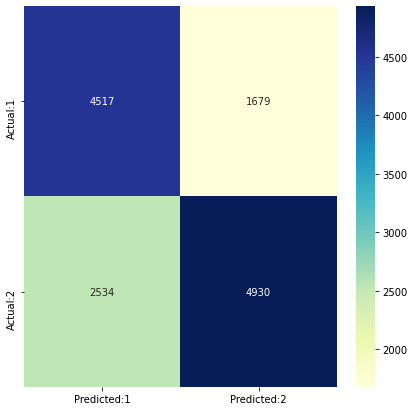

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2'],index=['Actual:1','Actual:2'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");